In [1]:
%matplotlib inline


# Bonus: Affine and AI
teacher notebook





### our image backbone libraries

In [2]:
#import libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
from skimage import data, io, color, img_as_float, exposure

### libraries generally good to have around

In [3]:
import os
import glob
import numpy as np
#import ipywidgets as widgets
import sys


# skimage time

In [4]:

from skimage import data
from skimage import transform
from skimage import img_as_float
from skimage.transform import rotate

## Our images

In [22]:
image_b = io.imread('cardiomegaly_cc0.png') # cardiomegaly CXR
image_g = io.imread('rotatechest.png') # a relatively normal CXR
image_y = io.imread('other_op.png') # a relatively normal CXR


### Let's examine the  images

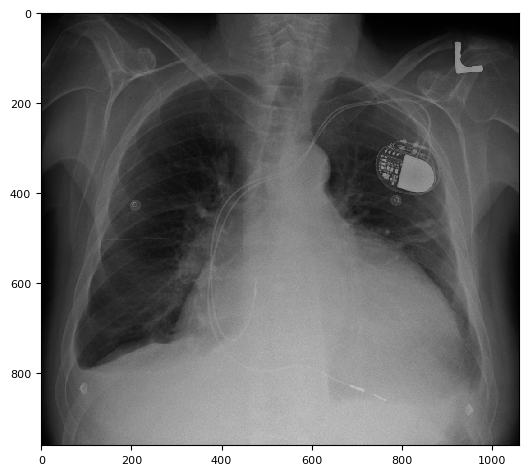

In [40]:
io.imshow(image_b)

## Let's look at some non-geometric transformations

C:\Users\makeda\anaconda3\envs\image_libraries\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
C:\Users\makeda\AppData\Local\Temp\ipykernel_25400\3930280784.py:50: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\makeda\anaconda3\envs\image_libraries\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on

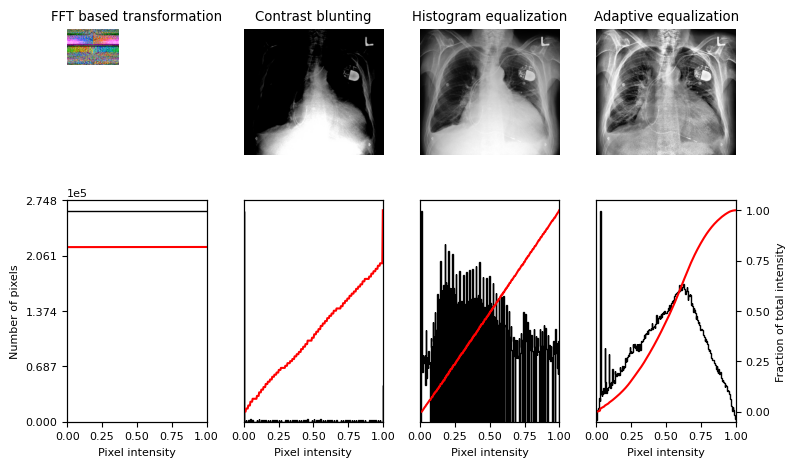

In [42]:
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist,  ax_cdf


# Load an example image
img = image_b

# Make an FFT trasnform

made_fourier = np.fft.fftshift(np.fft.fft2(image_h))

# Contrast blunting
p60, p90 = np.percentile(img, (60, 90))
img_rescale = exposure.rescale_intensity(img, in_range=(p60, p90))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(made_fourier[::1].real, axes[:, 0])
ax_img.set_title('FFT based transformation')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast blunting')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()



## Now let's get into geometric transformations

NB: rescale, resize etc. are geometric transformations, but so are all affines, which can be rotates or shears

Geometrical transformations involve multiplying our image matrix by another. 
NB: there is always a matrix that will not change ours, the identity matrix.

# Your task

You have been assigned to make an algorithm for cardiomegaly detection so patients can be notified if by change their X-ray shows cardiomegaly. You are given a dataset of healthy (no cardiomegaly) patients who went to an outpatient clinic  in a poor area staffed with first year radiography students and Xrays of cardiomegaly patients from a prestigeous hospital. 

Text(0.5, 1.0, 'Normal 2')

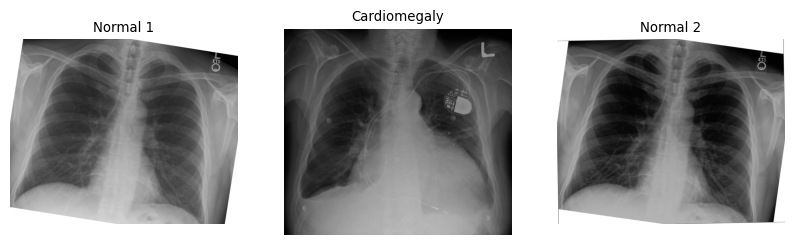

In [53]:
# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(image_g)
plt.axis('off')
plt.title("Normal 1")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(image_b)
plt.axis('off')
plt.title("Cardiomegaly")

# Adds a subplot at the 3nd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(image_y)
plt.axis('off')
plt.title("Normal 2")


You want to make a dataset of realistic upright chest X-rays from two images to generate a propsed pipeline for preprocessing. Your question is about the label of cardiomegaly, i.e. big hearts. Use skimage.tranform.rotate to produce two realistic augmented images  (name them new_pic1 and new_pic2) from the given 'normal' image, and then apply what you percieve as the two most critical algorithms to make them ready for classic supervised machine learning in one bit of code. (hint: look at the shape of the cardiomegaly image in more ways than one)

In [29]:
# code students need to add
new_pic1 = rotate(image_g, 5)
new_pic2 = rotate(image_g, 3)



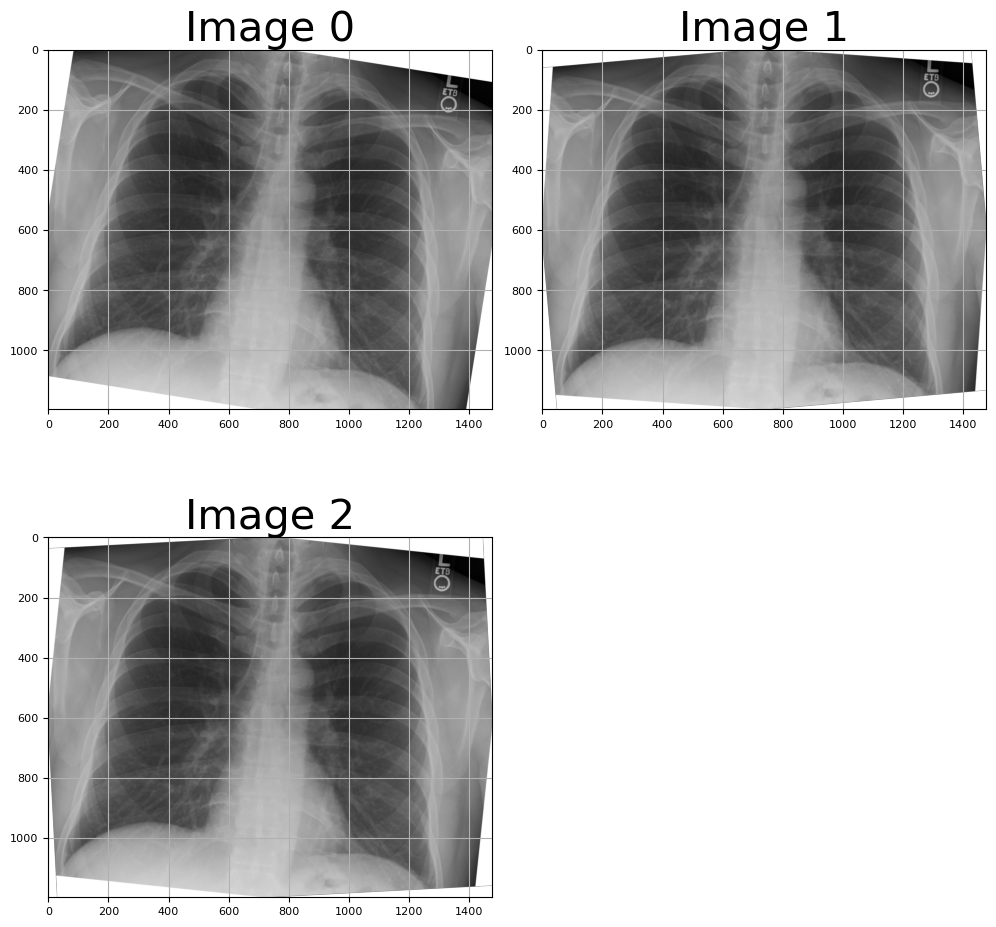

In [39]:
list_images = [image_g, new_pic1, new_pic2]


# boiler plate showing list adapted from 
# stackoverflowuser2010


def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

show_image_list(list_images, figsize=(10, 10))

In [32]:
# Potential extra algorithm 1 = shaving- otherwise the border is a strong line and obvious clue, and size normalize

In [54]:
# figure out how much to cut on sides
print("cut top/bottom:", (image_b.shape[0] - image_g.shape[0])/2)

# figure our how much to cut on top and bottom
print("cut sides:",(image_b.shape[1] - image_g.shape[1])/2)

cut sides: -119.0
cut top and bottom: -208.5


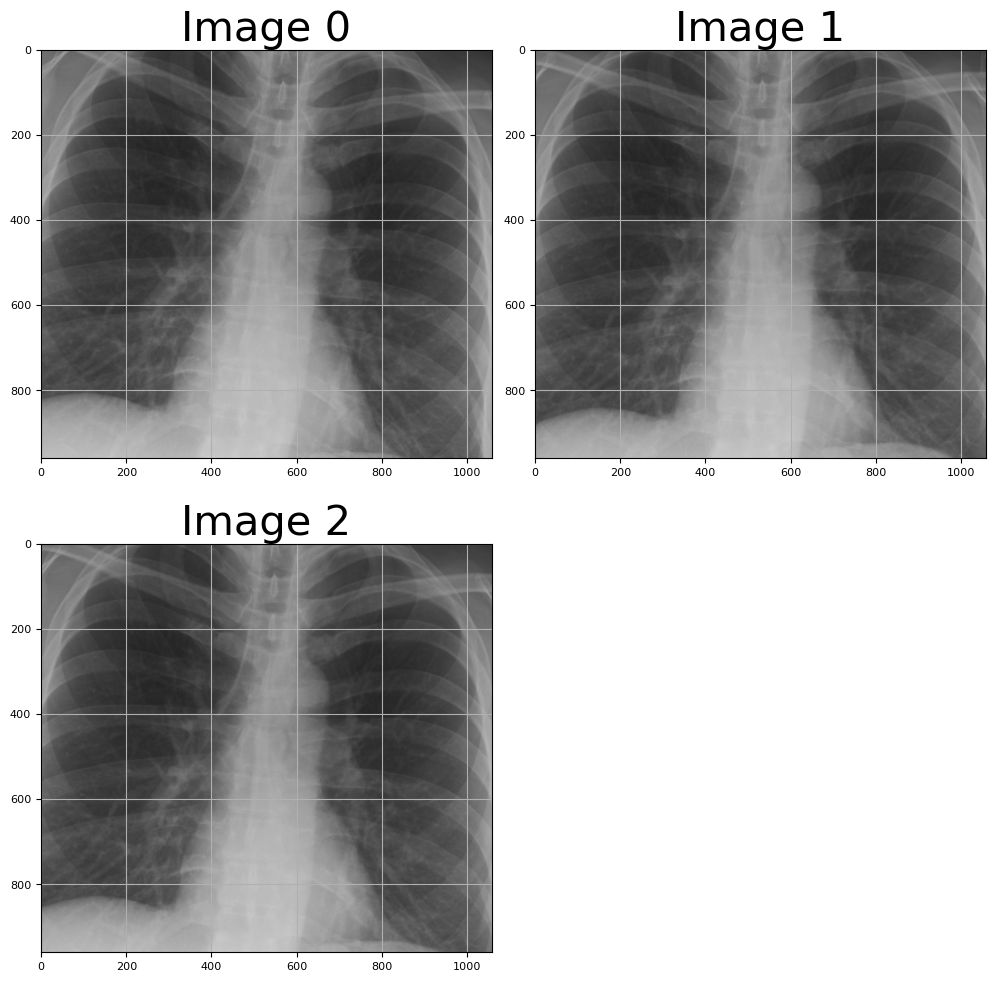

In [58]:
better_for_ml_list = []
for image in list_images:
    image = image[119:-119, 208: -209]
    better_for_ml_list.append(image)
show_image_list(better_for_ml_list, figsize=(10, 10))

An affine transformation is a transform that is one or  any combination of the following:

    Shifting
    Scaling
    Flipping over any axis
    Rotating
    Shearing



### let's now check that this works faster with code:

class skimage.transform.EuclideanTransform(matrix=None, rotation=None, translation=None, *, dimensionality=2)

inherits from ProjectiveTransform,

below from documentation in code itself

matrix : (D+1, D+1) array, optional
        Homogeneous transformation matrix.
rotation : float or sequence of float, optional
        Rotation angle in counter-clockwise direction as radians. If given as
        a vector, it is interpreted as Euler rotation angles [1]_. Only 2D
        (single rotation) and 3D (Euler rotations) values are supported. For
        higher dimensions, you must provide or estimate the transformation
        matrix.
translation : sequence of float, length D, optional
        Translation parameters for each axis.
dimensionality : int, optional
        The dimensionality of the transform.

In [ ]:
tform = transform.EuclideanTransform(
    rotation= 1.,
    translation = (100, -20)
    )
print(tform.params)

In [ ]:
img = img_as_float(image_h)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Euclidean transformation')

In [ ]:
image_g = io.imread('rotatechest.png')
io.imshow(image_g)